# This file is used to plot the training and validation accuracies for ResNet18 and its modifications.

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import shutil
import time

In [3]:
def retrieve_acc(filename):
    """
    This function retrieves the training and validation accuracies from the training. 
    The values are stored in text files, so we retrieved the values and appended it to lists.

    arguments:
    filename (str): the filepath/filename to the file with the accuracy values.

    returns:
    train_acc (list): list of training accuracies
    val_acc (list): list of validation accuracies
    """
    train_acc = []
    val_acc = []
    
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("train Loss"):
                train_acc.append(float(line.split(":")[-1]))
                # print(line)
            if line.startswith("val Loss"):
                val_acc.append(float(line.split(":")[-1]))
            # print(line)

    return train_acc, val_acc

In [4]:
og_resnet18_train, og_resnet18_val = retrieve_acc("./original_resnet18.txt")
print(f"og_resnet18_train: {len(og_resnet18_train)}\tog_resnet18_val: {len(og_resnet18_val)}")

og_resnet18_train: 100	og_resnet18_val: 100


In [5]:
og_resnet18_frozen_train, og_resnet18_frozen_val = retrieve_acc("./original_resnet18_frozen.txt")
print(f"og_resnet18_frozen_train: {len(og_resnet18_frozen_train)}\tog_resnet18_frozen_val: {len(og_resnet18_frozen_val)}")

og_resnet18_frozen_train: 100	og_resnet18_frozen_val: 100
[0.0245, 0.1049, 0.2235, 0.349, 0.4412, 0.5108, 0.5529, 0.5882, 0.6304, 0.6098, 0.651, 0.6627, 0.6912, 0.6667, 0.6892, 0.7029, 0.6686, 0.7098, 0.7275, 0.749, 0.7343, 0.7314, 0.7265, 0.7441, 0.7382, 0.748, 0.7284, 0.7245, 0.748, 0.7392, 0.7265, 0.752, 0.7333, 0.7382, 0.7422, 0.7324, 0.7529, 0.7265, 0.7451, 0.7578, 0.7363, 0.7431, 0.7451, 0.7627, 0.7765, 0.7657, 0.7647, 0.7539, 0.7284, 0.7549, 0.7412, 0.7588, 0.7412, 0.7843, 0.7833, 0.7706, 0.7471, 0.7863, 0.75, 0.7451, 0.7578, 0.7578, 0.7637, 0.7735, 0.7686, 0.7755, 0.7667, 0.7814, 0.7735, 0.7873, 0.7755, 0.752, 0.748, 0.749, 0.75, 0.751, 0.7559, 0.7608, 0.7549, 0.7804, 0.7784, 0.7294, 0.7539, 0.7441, 0.749, 0.7706, 0.7696, 0.7598, 0.7804, 0.752, 0.7637, 0.7598, 0.7657, 0.7667, 0.7578, 0.7422, 0.7559, 0.7725, 0.7647, 0.7755]


In [6]:
deformed_aft_conv_train, deformed_aft_conv_val = retrieve_acc("./deformed_aft_conv1.txt")
print(f"deformed_aft_conv_train: {len(deformed_aft_conv_train)}\tdeformed_aft_conv_val: {len(deformed_aft_conv_val)}")

deformed_aft_conv_train: 100	deformed_aft_conv_val: 100


In [7]:
deformed_plus_conv_train, deformed_plus_conv_val = retrieve_acc("./deformed_plus_conv1.txt")
print(f"deformed_plus_conv_train: {len(deformed_plus_conv_train)}\tdeformed_plus_conv_val: {len(deformed_plus_conv_val)}")

deformed_plus_conv_train: 100	deformed_plus_conv_val: 100
[0.0108, 0.0431, 0.0725, 0.1294, 0.1775, 0.2245, 0.2559, 0.3186, 0.3255, 0.3539, 0.4353, 0.45, 0.4735, 0.5176, 0.5137, 0.5382, 0.5667, 0.5539, 0.5912, 0.6284, 0.6431, 0.6275, 0.652, 0.6412, 0.6529, 0.6265, 0.6676, 0.6578, 0.7039, 0.6902, 0.7088, 0.7108, 0.7255, 0.7039, 0.6804, 0.7118, 0.6765, 0.7049, 0.7206, 0.7157, 0.7098, 0.7206, 0.7088, 0.7333, 0.7559, 0.7412, 0.7304, 0.7333, 0.7373, 0.7157, 0.7814, 0.7971, 0.8069, 0.8049, 0.8186, 0.8333, 0.8127, 0.8422, 0.8402, 0.8255, 0.8353, 0.8412, 0.8265, 0.8353, 0.8304, 0.8255, 0.8402, 0.8324, 0.8255, 0.8216, 0.8314, 0.8167, 0.8402, 0.8402, 0.8235, 0.8245, 0.8441, 0.8402, 0.8353, 0.8108, 0.85, 0.8363, 0.8265, 0.8216, 0.8382, 0.8451, 0.8451, 0.8206, 0.8324, 0.8225, 0.8284, 0.8353, 0.8412, 0.8304, 0.8392, 0.8441, 0.8412, 0.8402, 0.8529, 0.8157]


## This cell below is to plot my training and validation accuracies. 
On the left, it is the training accuracies for different models. 
On the right, it is the validation accuracies for different models. 

We have 4 plots, in the following order:
- The original ResNet18 accuracy that has unfrozen parameters. (Blue colour)
- The original ResNet18 accuracy that has frozen parameters. (Yellow colour)
- The modified ResNet18 model with deformed convolution layer AFTER the conv1 layer. (Green colour)
- The modified ResNet18 model with deformed convolution layer + the conv1 layer. (Red colour)

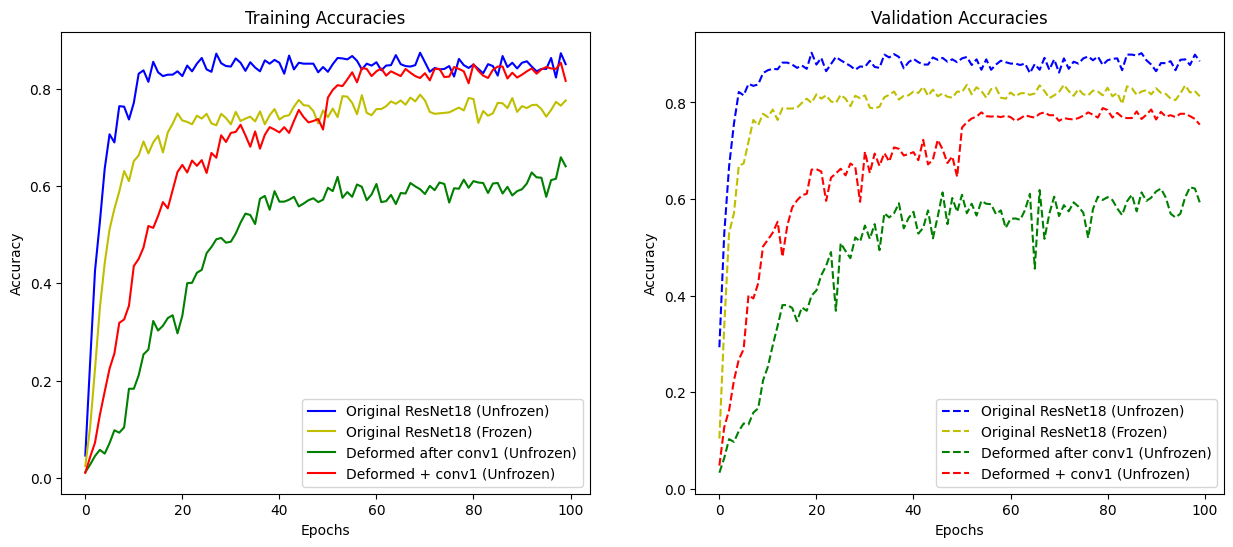

In [8]:
epochs = 100
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot training accuracies
ax1.plot(range(epochs), og_resnet18_train, 'b', label='Original ResNet18 (Unfrozen)')
ax1.plot(range(epochs), og_resnet18_frozen_train, 'y', label='Original ResNet18 (Frozen)')
ax1.plot(range(epochs), deformed_aft_conv_train, 'g', label='Deformed after conv1 (Unfrozen)')
ax1.plot(range(epochs), deformed_plus_conv_train, 'r', label='Deformed + conv1 (Unfrozen)')
ax1.set_title('Training Accuracies')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot validation accuracies
ax2.plot(range(epochs), og_resnet18_val, 'b--', label='Original ResNet18 (Unfrozen)')
ax2.plot(range(epochs), og_resnet18_frozen_val, 'y--', label='Original ResNet18 (Frozen)')
ax2.plot(range(epochs), deformed_aft_conv_val, 'g--', label='Deformed after conv1 (Unfrozen)')
ax2.plot(range(epochs), deformed_plus_conv_val, 'r--', label='Deformed + conv1 (Unfrozen)')
ax2.set_title('Validation Accuracies')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()